In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

In [3]:
raw = pd.read_csv('playoff_shots.csv')

In [28]:
raw.describe()

,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE
count,1.347000e+04,13470.000000,1.347000e+04,1.347000e+04,13470.000000,13470.000000,13470.000000,13470.000000,13470.000000,13470.000000,13470.0,13470.000000,1.347000e+04
mean,4.170019e+07,314.806756,4.212311e+05,1.610613e+09,2.474833,5.332368,28.922346,13.383370,1.108092,95.349517,1.0,0.456050,2.018046e+07
std,7.556924e+01,190.505139,5.534908e+05,8.804130e+00,1.134407,3.469381,17.493244,10.616865,110.370068,96.058897,0.0,0.498083,4.797265e+01
min,4.170010e+07,4.000000,1.891000e+03,1.610613e+09,1.000000,0.000000,0.000000,0.000000,-244.000000,-32.000000,1.0,0.000000,2.018041e+07
25%,4.170013e+07,149.000000,2.011450e+05,1.610613e+09,1.000000,2.000000,14.000000,2.000000,-45.000000,12.000000,1.0,0.000000,2.018042e+07
50%,4.170017e+07,313.000000,2.023550e+05,1.610613e+09,2.000000,5.000000,29.000000,13.000000,0.000000,57.000000,1.0,0.000000,2.018043e+07
75%,4.170023e+07,477.000000,2.039180e+05,1.610613e+09,3.000000,8.000000,44.000000,24.000000,49.000000,179.000000,1.0,1.000000,2.018051e+07
max,4.170040e+07,791.000000,1.628935e+06,1.610613e+09,5.000000,11.000000,59.000000,72.000000,248.000000,720.000000,1.0,1.000000,2.018060e+07


In [4]:
raw.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,41700131,149,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,24,...,Left Side Center(LC),24+ ft.,26,-168,206,1,0,20180415,CLE,IND
1,Shot Chart Detail,41700131,153,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,5,...,Center(C),Less Than 8 ft.,0,3,1,1,0,20180415,CLE,IND
2,Shot Chart Detail,41700131,155,2544,LeBron James,1610612739,Cleveland Cavaliers,1,0,58,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20180415,CLE,IND
3,Shot Chart Detail,41700131,187,2544,LeBron James,1610612739,Cleveland Cavaliers,2,11,8,...,Center(C),Less Than 8 ft.,1,-8,13,1,1,20180415,CLE,IND
4,Shot Chart Detail,41700131,195,2544,LeBron James,1610612739,Cleveland Cavaliers,2,10,22,...,Center(C),Less Than 8 ft.,1,2,10,1,1,20180415,CLE,IND


In [5]:
shot_made_flag = raw[pd.notnull(raw['SHOT_MADE_FLAG'])]

Text(0.5, 1.0, 'Position from where attempted shot was valid')

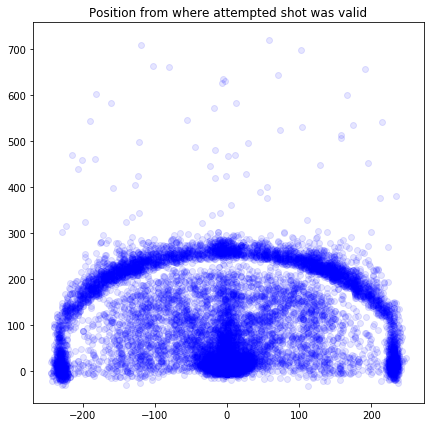

In [44]:
# alpha = 0.01
# alpha = 0.02
alpha = 0.1
plt.figure(figsize=(7,7))

plt.scatter(shot_made_flag.LOC_X, shot_made_flag.LOC_Y, color='blue', alpha=alpha)
plt.title('Position from where attempted shot was valid')

In [7]:
import matplotlib.cm as cm

In [29]:
plt.figure(figsize=(20,10))

def scatter_plot(feat):
    alpha = 0.1
    gs = shot_made_flag.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 3, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1].LOC_X, g[1].LOC_Y, color=c, alpha=alpha)

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'shot_zone_area')

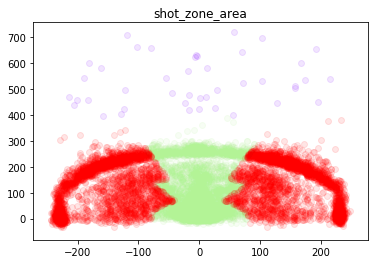

In [30]:
# shot_zone_area
scatter_plot('SHOT_ZONE_AREA')
plt.title('shot_zone_area')

Text(0.5, 1.0, 'shot_zone_basic')

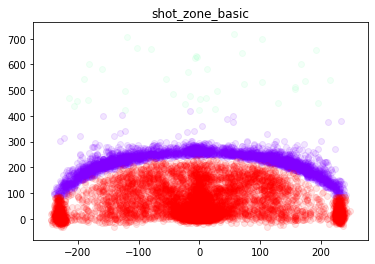

In [31]:
# shot_zone_basic
scatter_plot('SHOT_ZONE_BASIC')
plt.title('shot_zone_basic')

Text(0.5, 1.0, 'shot_zone_range')

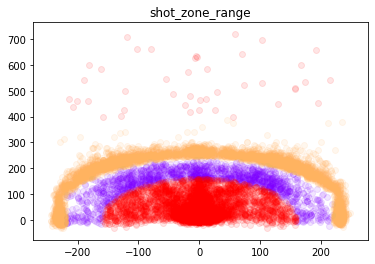

In [32]:
# shot_zone_range
scatter_plot('SHOT_ZONE_RANGE')
plt.title('shot_zone_range')

Text(0.5, 1.0, 'shot type')

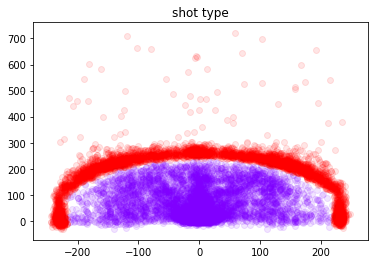

In [33]:
# shot_type
scatter_plot('SHOT_TYPE')
plt.title('shot type')

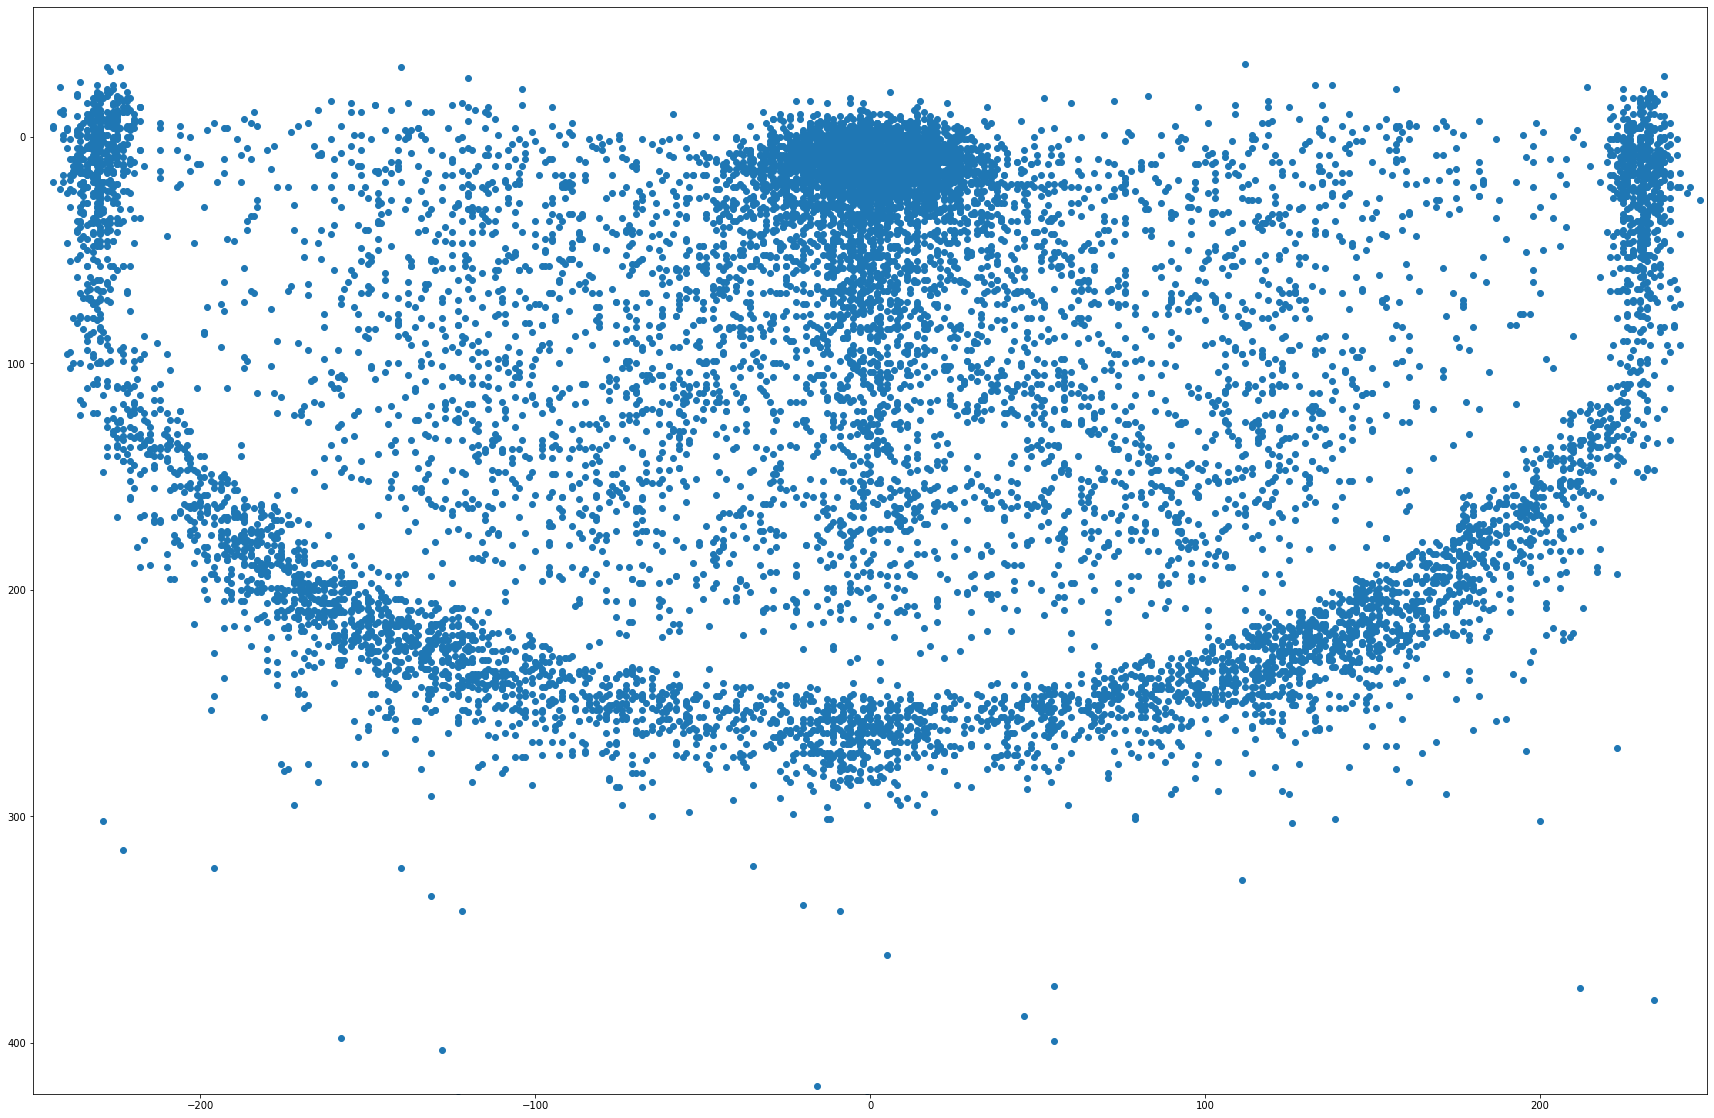

In [45]:
plt.figure(figsize=(30,20))
plt.scatter(raw.LOC_X, raw.LOC_Y)
# plt.xlim(300,-300)
plt.xlim(-250,250)
plt.ylim(422.5, -57.5)
plt.show()